# Author: Namagiri Lakshmi TB
Task 2 :- Prediction using Unsupervised Machine Learning.


K-means clustering with visual representation.


Organisation: The Sparks Foundation

In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("pastel")
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [11]:
#reading the dataset
df=pd.read_csv("iris1.csv")

In [12]:
#checking the first five elements
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#checking the shape of our dataset
df.shape

(150, 6)

In [14]:
#checking for the presence of null values.
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [83]:
#checking for info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 6 columns):
Id               146 non-null int64
SepalLengthCm    146 non-null float64
SepalWidthCm     146 non-null float64
PetalLengthCm    146 non-null float64
PetalWidthCm     146 non-null float64
Species          146 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


In [84]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,146.0,76.582192,43.453305,1.0,40.25,77.5,113.75,150.0
SepalLengthCm,146.0,5.856849,0.834093,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,146.0,3.036986,0.395145,2.2,2.80,3.0,3.30,4.0
PetalLengthCm,146.0,3.807534,1.757117,1.0,1.60,4.4,5.10,6.9
PetalWidthCm,146.0,1.219863,0.760365,0.1,0.30,1.3,1.80,2.5


In [16]:
#correlation
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Visualizations

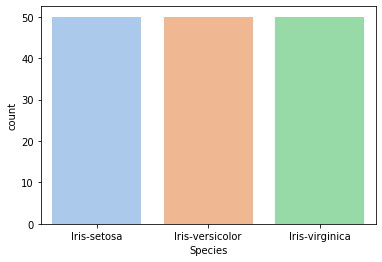

In [56]:
#visualizing the count 
sns.countplot(x = 'Species',data = df)

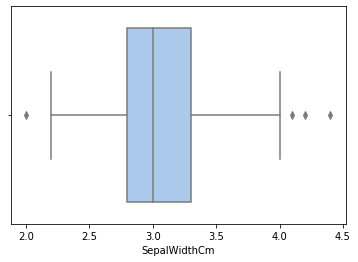

In [69]:
# To find outliers
sns.boxplot(df['SepalWidthCm'])

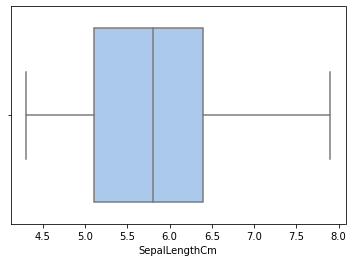

In [71]:
sns.boxplot(df['SepalLengthCm'])

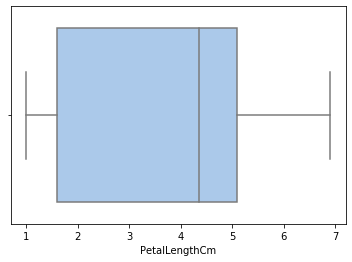

In [72]:
sns.boxplot(df['PetalLengthCm'])

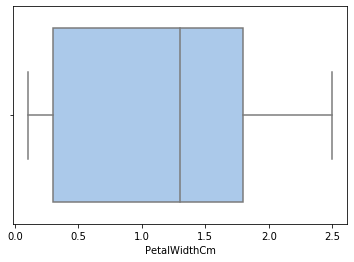

In [73]:
sns.boxplot(df['PetalWidthCm'])

In [77]:
# To remove outliers from SeaplWidthCm
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]


In [78]:
#to check if outliers are dropped
df.shape

(146, 6)

We notice the rows have reduced from 150 to 146 after removing the outliers.

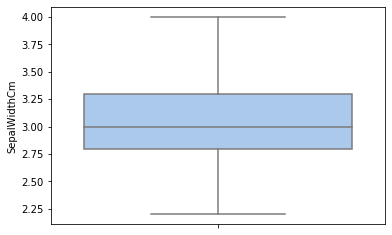

In [80]:
# checking if the outliers are removed from sepalwidthcm
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

We have successfully removed the outliers

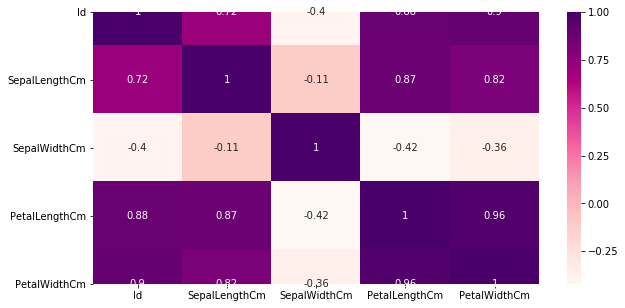

In [58]:
# Finding correlation between columns using heatmap
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap="RdPu")
plt.show()

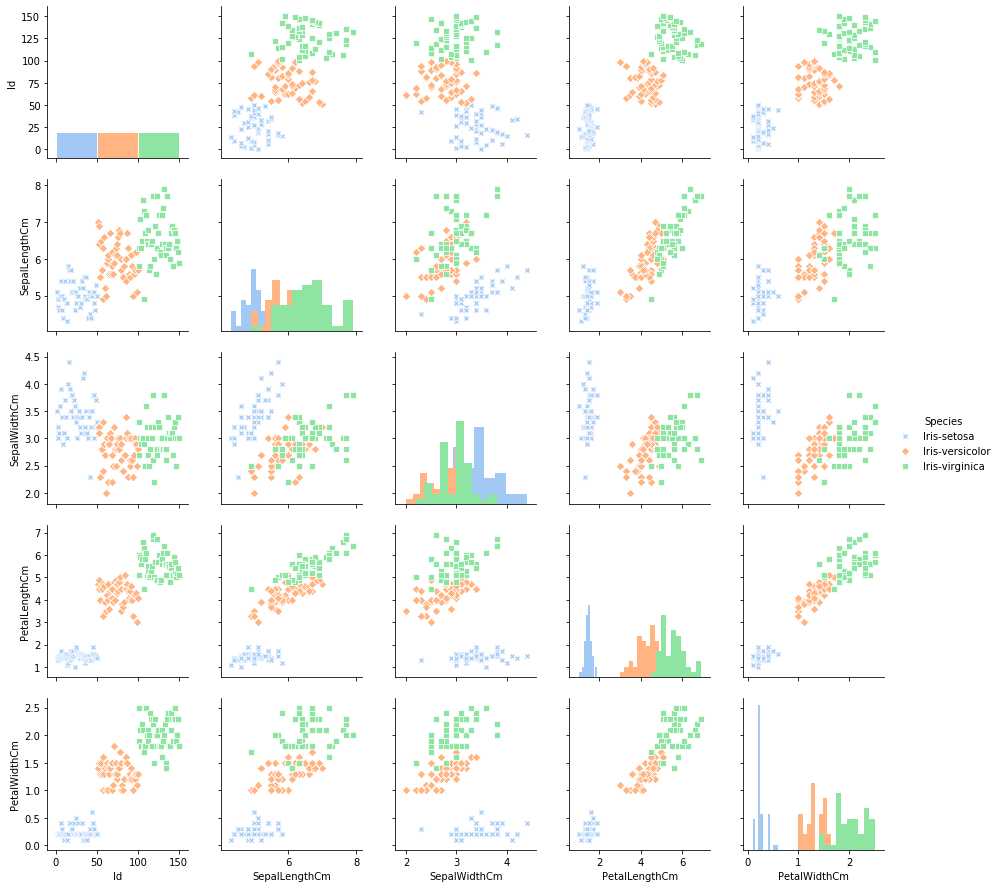

In [67]:

sns.pairplot(df,hue='Species',diag_kind="hist",markers=["X","D","s"])

In [60]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

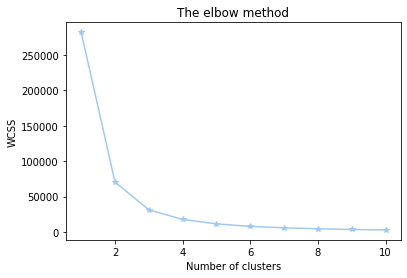

In [61]:
# Plotting the results onto a line graph,allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,'*-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum clusters is where the elbow occurs.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
WE CAN SELECT THE NUMBER OF CLUSTERS AS 3

In [62]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

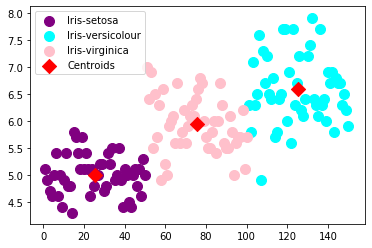

In [66]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red',marker="D" ,label = 'Centroids')

plt.legend()

Clusteriong is a unsupervised machine learning technique.

A cluster is a collection of objects that are similar.

Objective is to group similar datapoints into a group.

we notice that our dataset has 150 rows and 6 columns.

Large K value produces smaller groups and small K value produces larger K groups.

There are no null valuesd present in our dataset.

We notice the presence of outliers in SepalWidthCm columns.

Removal of outliers using the IQR method, we notice a drop of 4 rows which indicates the outliers are treated.

THANK YOU!

